In [2]:
import pandas as pd
import numpy as np


from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import svm

from scipy import interp
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import  TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_clean = pd.read_csv('Amazon_mobile_clean.csv')
df_clean.head()

,review_body,star_rating,vine,verified_purchase,subjectivity,polarity,s_subjectivity,s_polarity,sentiment,s_sentiment,...,flesch_kincaid_grade,automated_readability_index,coleman_liau_index,linsear_write_formula,dale_chall_readability_score,noun_count,verb_count,adv_count,adj_count,helpfulness
0,advertised everything works perfectly im happy...,5.0,0,1,1.000000,0.800000,1.00,0.8,2,2,...,11.5,11.2,13.04,11.5,9.64,6,4,1,1,0
1,great,5.0,0,1,0.750000,0.800000,0.00,0.0,2,1,...,-3.5,2.6,-16.41,-0.5,0.05,0,0,0,1,0
2,work great fit life proof case iphone,5.0,0,1,0.575000,0.600000,0.75,0.8,2,2,...,-1.2,2.9,5.75,2.5,8.50,5,0,0,2,0
3,work well couldnt get used hearing anything ea...,4.0,0,1,0.000000,0.000000,0.00,0.0,1,1,...,3.3,7.7,11.22,3.5,7.59,3,3,1,2,0
4,careful products bought several cameras image ...,2.0,0,1,0.666667,0.079167,0.00,0.0,2,1,...,10.3,14.0,18.08,6.0,12.13,6,2,1,3,0


In [4]:
df_clean.describe()

,star_rating,vine,verified_purchase,subjectivity,polarity,s_subjectivity,s_polarity,sentiment,s_sentiment,character_count,...,flesch_kincaid_grade,automated_readability_index,coleman_liau_index,linsear_write_formula,dale_chall_readability_score,noun_count,verb_count,adv_count,adj_count,helpfulness
count,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,...,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000
mean,3.763160,0.000172,0.843057,0.528170,0.260273,0.398219,0.260792,1.696548,1.409416,205.327878,...,14.995877,20.396440,13.566809,16.553526,12.035622,13.484668,6.567017,2.732773,6.392610,0.255544
std,1.523537,0.013102,0.363749,0.217259,0.278892,0.375905,0.406042,0.665458,0.643437,313.229611,...,18.473137,23.410799,6.986570,16.562875,3.695578,20.580184,9.993924,4.349724,9.454552,0.436169
min,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,-15.700000,-16.300000,-39.610000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,0.425618,0.075000,0.000000,0.000000,2.000000,1.000000,69.000000,...,6.800000,10.100000,11.820000,5.500000,10.350000,4.000000,2.000000,0.000000,2.000000,0.000000
50%,4.000000,0.000000,1.000000,0.541667,0.250000,0.444444,0.000000,2.000000,1.000000,116.000000,...,10.700000,14.800000,14.800000,11.000000,12.030000,8.000000,4.000000,2.000000,4.000000,0.000000
75%,5.000000,0.000000,1.000000,0.658163,0.433333,0.750000,0.600000,2.000000,2.000000,228.000000,...,17.400000,22.800000,17.220000,21.500000,13.810000,15.000000,8.000000,3.000000,7.000000,1.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,8928.000000,...,527.800000,677.500000,250.400000,98.000000,73.340000,595.000000,312.000000,147.000000,266.000000,1.000000


In [5]:
df_clean.head()

,review_body,star_rating,vine,verified_purchase,subjectivity,polarity,s_subjectivity,s_polarity,sentiment,s_sentiment,...,flesch_kincaid_grade,automated_readability_index,coleman_liau_index,linsear_write_formula,dale_chall_readability_score,noun_count,verb_count,adv_count,adj_count,helpfulness
0,advertised everything works perfectly im happy...,5.0,0,1,1.000000,0.800000,1.00,0.8,2,2,...,11.5,11.2,13.04,11.5,9.64,6,4,1,1,0
1,great,5.0,0,1,0.750000,0.800000,0.00,0.0,2,1,...,-3.5,2.6,-16.41,-0.5,0.05,0,0,0,1,0
2,work great fit life proof case iphone,5.0,0,1,0.575000,0.600000,0.75,0.8,2,2,...,-1.2,2.9,5.75,2.5,8.50,5,0,0,2,0
3,work well couldnt get used hearing anything ea...,4.0,0,1,0.000000,0.000000,0.00,0.0,1,1,...,3.3,7.7,11.22,3.5,7.59,3,3,1,2,0
4,careful products bought several cameras image ...,2.0,0,1,0.666667,0.079167,0.00,0.0,2,1,...,10.3,14.0,18.08,6.0,12.13,6,2,1,3,0


In [6]:

# # data normalization with sklearn
# from sklearn.preprocessing import MinMaxScaler

# # fit scaler on training data
# norm = MinMaxScaler().fit(X_train)

# # transform training data
# X_train_norm = norm.transform(X_train)

# # transform testing dataabs
# X_test_norm = norm.transform(X_test)

In [7]:
# # Creating Function for Dwonsampling
# def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
#     # find the number of observations in the smallest group
#     nmin = df[label_col_name].value_counts().min()
#     return (df
#             # split the dataframe per group
#             .groupby(label_col_name)
#             # sample nmin observations from each group
#             .apply(lambda x: x.sample(nmin))
#             # recombine the dataframes
#             .reset_index(drop=True)
#             )

In [8]:
# df_clean = downsample(df_clean, label_col_name = 'helpfulness')

In [9]:
df_clean.shape

(104847, 26)

In [10]:
# #reducing the sample to 1mil
# df_clean=df_clean.sample(500000)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10000,ngram_range=(2,2))
# TF-IDF feature matrix
tfidf_idf = tfidf_vectorizer.fit_transform(df_clean['review_body'].values.astype('str'))

In [14]:
tfidf_idf


<104847x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 717445 stored elements in Compressed Sparse Row format>

In [16]:
# Here we are using 10 best selected features,for our model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


from scipy.sparse import hstack, csr_matrix

meta_features = [
'linsear_write_formula',
'unique_word_count',
'flesch_kincaid_grade',
'automated_readability_index',
'word_count',
'character_count',
'adj_count',
'syllable_count',
'noun_count',
'verb_count']

feature_set1 = df_clean[meta_features]


train = hstack([tfidf_idf, csr_matrix(feature_set1)], "csr")
train

<104847x10010 sparse matrix of type '<class 'numpy.float64'>'
	with 1743975 stored elements in Compressed Sparse Row format>

In [17]:
target = df_clean['helpfulness'].values

In [18]:
target

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
# Defining the X
X = train
## defining the target columns
y = target

In [20]:
y.shape

(104847,)

In [21]:
X.shape

(104847, 10010)

In [22]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=130)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({0: 78054, 1: 26793})
Resampled dataset shape Counter({0: 78054, 1: 78054})


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25, random_state=0)

In [26]:
# print("\nAccuracy:", accuracy_score(y_test, predictions))

# print("\nClassification report:")
# print(classification_report(y_test, y_pred))

# print("\nROC / AUC:")
# plotRocAuc(model, X_test, y_test)

In [27]:
# from sklearn.model_selection import cross_val_score
# model = DecisionTreeClassifier()
# cross_val_score(model, X, y, cv=10)

In [26]:
# Define a function to plot the ROC/AUC
def evbiclas(model,cr=0):
  preds = model.predict(X_test)
  print('\n'+'\033[1m'+type(model).__name__+'\033[0;0m')    
  print("----------------------------------")
  print("\nTrain Accuracy:","{:.2f}".format(model.score(X_train, y_train)*100))

  print("\nTest Accuracy:", "{:.2f}".format(model.score(X_test, y_test)*100))

  print("\nClassification report:")
  print(classification_report(preds, y_test))

  print("\nConfusion matrix:")
  # Creating the confusion matrix
  cm = confusion_matrix(preds, y_test)
  # Assigning columns names
  cm_df = pd.DataFrame(cm, 
              columns = ['Predicted Positive','Predicted Negative'],
              index = [ 'Actual Positive','Actual Negative'])
  print(cm_df)
  print("----------------------------------")
  sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
  print('\nSensitivity : ',"{:.2f}".format(sensitivity1*100))

  specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
  print('Specificity : ', "{:.2f}".format(specificity1*100))
  print("\nROC / AUC:")


  probabilities = model.predict_proba(X_test)
  probabilities = probabilities[:, 1]  # keep probabilities for first class only
        
  # Compute the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, probabilities)    
  plt.figure(figsize = (10,7))
  plt.title(f"ROC Curve with AUC = {str(round(roc_auc_score(y_test, probabilities),3))}", fontsize=22)
  # Plot the "dumb model" line
  plt.plot([0, 1], [0, 1], linestyle='--',label='baseline')
    
  # Plot the model line
  plt.plot(fpr, tpr, marker='.',label='ROC Curve')
  plt.text(0.75, 0.25, "AUC: " + str(round(roc_auc_score(y_test, probabilities),3)),fontsize=18)
    
  plt.ylabel('Sensitivity', fontsize=18)
  plt.xlabel('1 - Specificity', fontsize=18)

  plt.legend(fontsize=16)
    
  # show the plot
  plt.show();




  print("\n----------------------------------")
  print("\nCross Validation 10K fold Result")
  print('\n')
  if type(cr)==int:
    print('\033[1m*Cross validation Result Not avaible*\033[0;0m')
  else:
    ud=1
    for i in cr:
      print('K',ud,':',"{:.2f}".format(i*100))
      ud=ud+1
  print("\n----------------------------------")
  print('The Model Parameters:','\n',model.get_params())


ExtraTreesClassifier
----------------------------------

Train Accuracy: 99.65

Test Accuracy: 88.11

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     19124
           1       0.89      0.88      0.88     19903

    accuracy                           0.88     39027
   macro avg       0.88      0.88      0.88     39027
weighted avg       0.88      0.88      0.88     39027


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive               16909                2215
Actual Negative                2427               17476
----------------------------------

Sensitivity :  88.42
Specificity :  87.81

ROC / AUC:


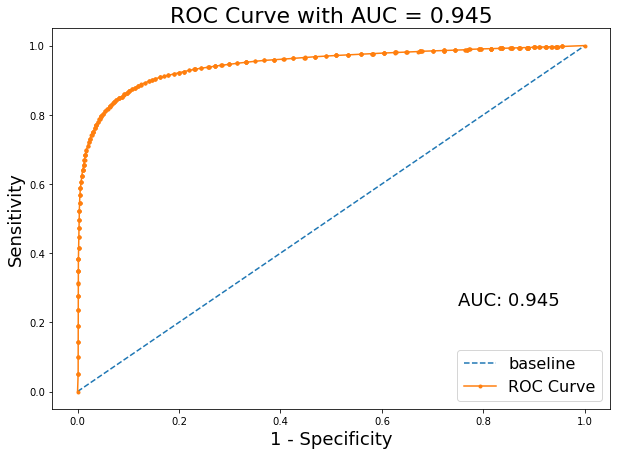


----------------------------------

Cross Validation 10K fold Result


*Cross validation Result Not avaible*

----------------------------------
The Model Parameters: 
 {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [73]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
evbiclas(model)


BernoulliNB
----------------------------------

Train Accuracy: 70.89

Test Accuracy: 70.26

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.65      0.74     25321
           1       0.55      0.79      0.65     13706

    accuracy                           0.70     39027
   macro avg       0.70      0.72      0.70     39027
weighted avg       0.75      0.70      0.71     39027


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive               16526                8795
Actual Negative                2810               10896
----------------------------------

Sensitivity :  65.27
Specificity :  79.50

ROC / AUC:


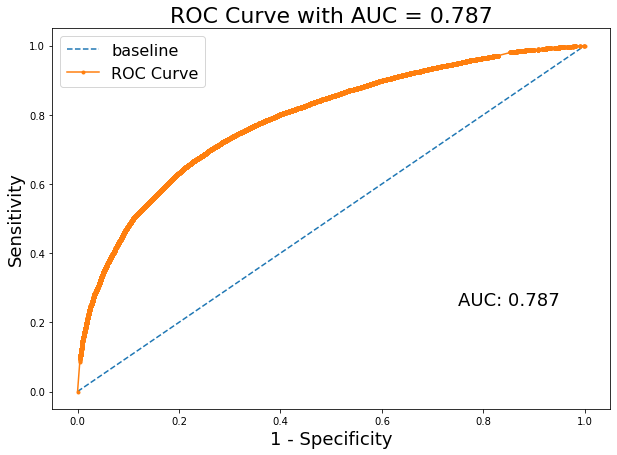


----------------------------------

Cross Validation 10K fold Result


*Cross validation Result Not avaible*

----------------------------------
The Model Parameters: 
 {'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}


In [78]:
model = BernoulliNB()
model.fit(X_train, y_train)
preds = model.predict(X_test)
evbiclas(model)


DecisionTreeClassifier
----------------------------------

Train Accuracy: 99.65

Test Accuracy: 79.14

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     20863
           1       0.75      0.82      0.78     18164

    accuracy                           0.79     39027
   macro avg       0.79      0.79      0.79     39027
weighted avg       0.79      0.79      0.79     39027


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive               16029                4834
Actual Negative                3307               14857
----------------------------------

Sensitivity :  76.83
Specificity :  81.79

ROC / AUC:


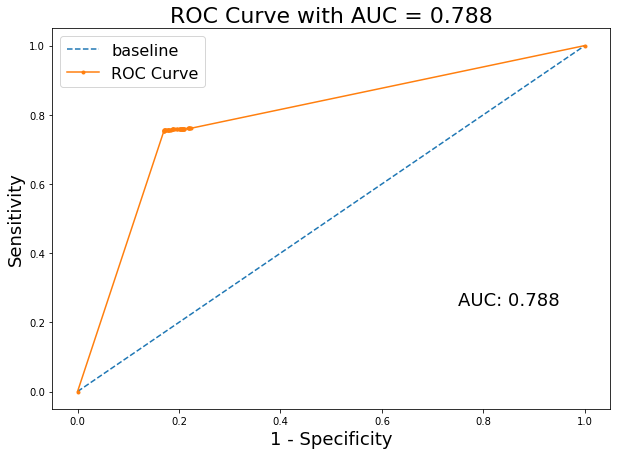


----------------------------------

Cross Validation 10K fold Result


*Cross validation Result Not avaible*

----------------------------------
The Model Parameters: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [75]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
evbiclas(model)


RandomForestClassifier
----------------------------------

Train Accuracy: 99.65

Test Accuracy: 85.17

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85     20346
           1       0.83      0.87      0.85     18681

    accuracy                           0.85     39027
   macro avg       0.85      0.85      0.85     39027
weighted avg       0.85      0.85      0.85     39027


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive               16948                3398
Actual Negative                2388               16293
----------------------------------

Sensitivity :  83.30
Specificity :  87.22

ROC / AUC:


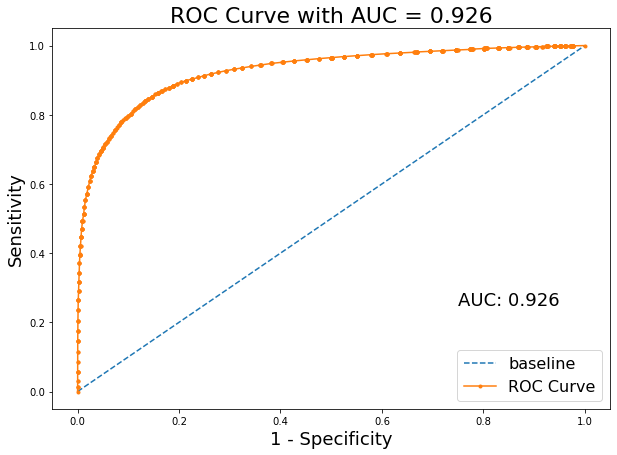


----------------------------------

Cross Validation 10K fold Result


*Cross validation Result Not avaible*

----------------------------------
The Model Parameters: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [76]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
evbiclas(model)


XGBClassifier
----------------------------------

Train Accuracy: 82.16

Test Accuracy: 81.33

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83     23339
           1       0.71      0.90      0.79     15688

    accuracy                           0.81     39027
   macro avg       0.81      0.83      0.81     39027
weighted avg       0.83      0.81      0.82     39027


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive               17695                5644
Actual Negative                1641               14047
----------------------------------

Sensitivity :  75.82
Specificity :  89.54

ROC / AUC:


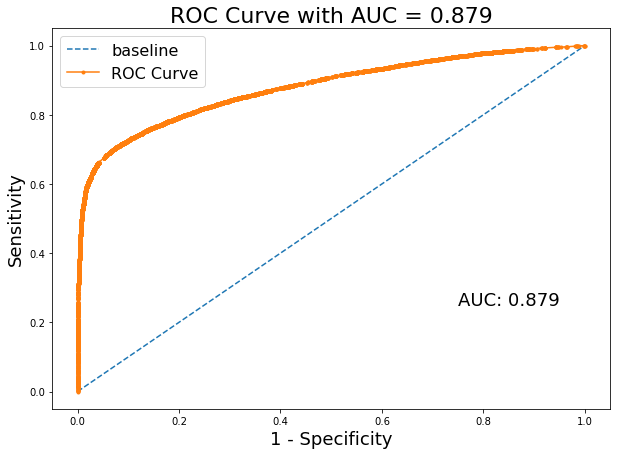


----------------------------------

Cross Validation 10K fold Result


*Cross validation Result Not avaible*

----------------------------------
The Model Parameters: 
 {'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 1, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [77]:
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
evbiclas(model)


KNeighborsClassifier
----------------------------------

Train Accuracy: 80.68

Test Accuracy: 71.91

Classification report:
              precision    recall  f1-score   support

           0       0.55      0.83      0.66     12763
           1       0.89      0.67      0.76     26264

    accuracy                           0.72     39027
   macro avg       0.72      0.75      0.71     39027
weighted avg       0.78      0.72      0.73     39027


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive               10569                2194
Actual Negative                8767               17497
----------------------------------

Sensitivity :  82.81
Specificity :  66.62

ROC / AUC:


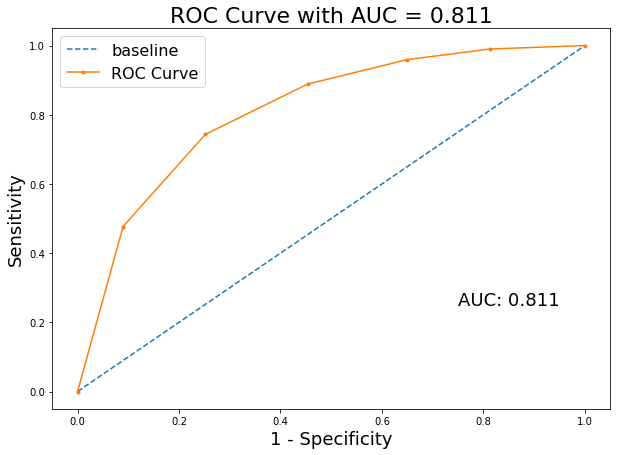


----------------------------------

Cross Validation 10K fold Result


*Cross validation Result Not avaible*

----------------------------------
The Model Parameters: 
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [79]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
evbiclas(model)

In [27]:
model = svm.SVC(probability=True)
model.fit(X_train, y_train)
preds = model.predict(X_test)
evbiclas(model)


SVC
----------------------------------

Train Accuracy: 63.58

Test Accuracy: 63.19

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66     22592
           1       0.55      0.66      0.60     16435

    accuracy                           0.63     39027
   macro avg       0.63      0.64      0.63     39027
weighted avg       0.65      0.63      0.63     39027


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive               13782                8810
Actual Negative                5554               10881
----------------------------------

Sensitivity :  61.00
Specificity :  66.21

ROC / AUC:


NameError: name 'plt' is not defined